In [4]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import json
from urllib.request import urlopen,urlretrieve
from shapely.geometry import shape as Shape, Point


# Major analytical tasks on the city level will include monitoring and interpreting data on local order volume, 
# local fleet size/growth, 
# fleet quality and engagement,
# local customer growth, 
# merchant performance, 
# customer, 
# fleet and merchant feedback, 
# market settings and density & zoning. 

#Read to DataFrame and date/time formatting
df = pd.read_csv('analyze_me.csv',
                 parse_dates= ['when_the_delivery_started',
                              'when_the_Jumpman_arrived_at_pickup',
                              'when_the_Jumpman_left_pickup',
                              'when_the_Jumpman_arrived_at_dropoff'],
                 infer_datetime_format = True,
                 converters = {'how_long_it_took_to_order':pd.to_timedelta})

#Add fields for pickup/order wait times
df['pickup_wait_time'] = (df.when_the_Jumpman_left_pickup - df.when_the_Jumpman_arrived_at_pickup)   
df['order_wait_time'] = (df.when_the_Jumpman_arrived_at_dropoff - df.when_the_delivery_started)   


#Returns feature for coordinates using dict of feature:Shape
def getFeatureforPoint(shapeDict,lon,lat):
    point = Point(lon,lat)
    for feature, shape in shapeDict.items():
        if shape.contains(point):
            return(feature)

#Geodata from NYC OpenData 
boroughBoundaries = urlopen('https://data.cityofnewyork.us/resource/7t3b-ywvw.json').read().decode('utf-8')
boroughDict = { borough['boro_name']: Shape(borough['the_geom']) for borough in json.loads(boroughBoundaries)}

#NTA (Neighbordhood Tabulation Area) Boundaries 
ntaBoundaries = urlopen('https://data.cityofnewyork.us/resource/93vf-i5bz.json').read().decode('utf-8')
ntaDict = { nta['ntaname']: Shape(nta['the_geom']) for nta in json.loads(ntaBoundaries)}

#Add borough and NTA for each pickup/dropoff location
df['pickup_borough'] = df.apply(lambda row: getFeatureforPoint(boroughDict,  row['pickup_lon'], row['pickup_lat']), axis=1)
df['dropoff_borough'] = df.apply(lambda row: getFeatureforPoint(boroughDict, row['dropoff_lon'], row['dropoff_lat']), axis=1)
df['pickup_NTA'] = df.apply(lambda row: getFeatureforPoint(ntaDict,  row['pickup_lon'], row['pickup_lat']), axis=1)
df['dropoff_NTA'] = df.apply(lambda row: getFeatureforPoint(ntaDict, row['dropoff_lon'], row['dropoff_lat']), axis=1)



#see if it takes longer to order for certain vendors


In [145]:
df.head()

delivery_id  customer_id  jumpman_id vehicle_type         pickup_place  \
0      1457973       327168      162381          van            Melt Shop   
1      1377056        64452      104533      bicycle  Prince Street Pizza   
2      1476547        83095      132725      bicycle           Bareburger   
3      1485494       271149      157175      bicycle          Juice Press   
4      1327707       122609      118095      bicycle    Blue Ribbon Sushi   

  place_category                    item_name  item_quantity  \
0       American                     Lemonade            1.0   
1          Pizza        Neapolitan Rice Balls            3.0   
2         Burger                   Bare Sodas            1.0   
3      Juice Bar      OMG! My Favorite Juice!            1.0   
4       Japanese  Spicy Tuna & Tempura Flakes            2.0   

     item_category_name how_long_it_took_to_order  \
0             Beverages           00:19:58.582052   
1            Munchables           00:25:09.107093   
2                Drinks           00:06:44.541717   
3   Cold Pressed Juices                       NaT   
4  Maki (Special Rolls)           00:03:45.035418   

                      ...                      when_the_delivery_started  \
0                     ...                     2014-10-26 13:51:59.898924   
1                     ...                     2014-10-16 21:58:58.654910   
2                     ...                     2014-10-28 21:39:52.654394   
3                     ...                     2014-10-30 10:54:11.531894   
4                     ...                     2014-10-10 00:07:18.450505   

   when_the_Jumpman_arrived_at_pickup  when_the_Jumpman_left_pickup  \
0                                 NaT                           NaT   
1          2014-10-16 22:26:02.120931    2014-10-16 22:48:23.091253   
2          2014-10-28 21:37:18.793405    2014-10-28 21:59:09.984810   
3          2014-10-30 11:04:17.759577    2014-10-30 11:16:37.895816   
4          2014-10-10 00:14:42.702223    2014-10-10 00:25:19.400294   

   when_the_Jumpman_arrived_at_dropoff pickup_wait_time order_wait_time  \
0           2014-10-26 14:52:06.313088              NaT 01:00:06.414164   
1           2014-10-16 22:59:22.948873  00:22:20.970322 01:00:24.293963   
2           2014-10-28 22:04:40.634962  00:21:51.191405 00:24:47.980568   
3           2014-10-30 11:32:38.090061  00:12:20.136239 00:38:26.558167   
4           2014-10-10 00:48:27.150595  00:10:36.698071 00:41:08.700090   

  pickup_borough dropoff_borough                                  pickup_NTA  \
0      Manhattan       Manhattan  Hudson Yards-Chelsea-Flatiron-Union Square   
1      Manhattan       Manhattan      SoHo-TriBeCa-Civic Center-Little Italy   
2      Manhattan       Manhattan                                West Village   
3      Manhattan       Manhattan                                West Village   
4      Manhattan       Manhattan      SoHo-TriBeCa-Civic Center-Little Italy   

                                  dropoff_NTA  
0                       Midtown-Midtown South  
1                                   Chinatown  
2                                West Village  
3  Hudson Yards-Chelsea-Flatiron-Union Square  
4           Battery Park City-Lower Manhattan  

[5 rows x 24 columns]

In [7]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import json
from urllib.request import urlopen,urlretrieve
from shapely.geometry import shape as Shape, Point

df = pd.read_csv('analyze_me_updated.csv',encoding = "ISO-8859-1")

#boro = urlopen('https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON').read()

In [43]:
df.groupby(['dropoff_lon','dropoff_lat']).size().transform(lambda x: (x ) / x.max())


dropoff_lon  dropoff_lat
-74.017679   40.710185      0.071429
-74.017288   40.705449      0.023810
-74.017149   40.707180      0.023810
-74.017122   40.707219      0.023810
-74.017062   40.709547      0.023810
-74.016965   40.706335      0.023810
-74.016943   40.706284      0.190476
-74.016888   40.707097      0.047619
-74.016875   40.706335      0.047619
-74.016715   40.706294      0.023810
-74.016436   40.711346      0.214286
-74.016321   40.710944      0.071429
-74.016314   40.708385      0.023810
-74.016043   40.716711      0.023810
-74.015971   40.705161      0.023810
-74.015867   40.709323      0.142857
-74.015617   40.706364      0.047619
-74.015575   40.716209      0.190476
-74.015542   40.707602      0.023810
-74.015465   40.708618      0.119048
-74.015291   40.716043      0.023810
-74.015141   40.709534      0.023810
-74.015085   40.717204      0.023810
-74.014948   40.716950      0.023810
-74.014906   40.715900      0.047619
-74.014869   40.708030      0.119048
-74.014823   

In [25]:
import folium


map1 = folium.Map(location=[40.7261, -73.9727], zoom_start=12, tiles='cartodbpositron')
map1.choropleth( data=df.groupby('dropoff_NTA').size(),
    geo_str=urlopen('https://data.cityofnewyork.us/api/geospatial/d3qk-pfyz?method=export&format=GeoJSON').read().decode('utf-8'),
             key_on='properties.ntaname',
             fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Dropoffs')
map1

In [29]:
import folium
map1 = folium.Map(location=[40.7261, -73.9727], zoom_start=11.5, tiles='cartodbpositron')
map1

In [7]:
df.head()

delivery_id  customer_id  jumpman_id vehicle_type         pickup_place  \
0      1457973       327168      162381          van            Melt Shop   
1      1377056        64452      104533      bicycle  Prince Street Pizza   
2      1476547        83095      132725      bicycle           Bareburger   
3      1485494       271149      157175      bicycle          Juice Press   
4      1327707       122609      118095      bicycle    Blue Ribbon Sushi   

  place_category                    item_name  item_quantity  \
0       American                     Lemonade            1.0   
1          Pizza        Neapolitan Rice Balls            3.0   
2         Burger                   Bare Sodas            1.0   
3      Juice Bar      OMG! My Favorite Juice!            1.0   
4       Japanese  Spicy Tuna & Tempura Flakes            2.0   

     item_category_name how_long_it_took_to_order  \
0             Beverages           00:19:58.582052   
1            Munchables           00:25:09.107093   
2                Drinks           00:06:44.541717   
3   Cold Pressed Juices                       NaT   
4  Maki (Special Rolls)           00:03:45.035418   

                      ...                      when_the_delivery_started  \
0                     ...                     2014-10-26 13:51:59.898924   
1                     ...                     2014-10-16 21:58:58.654910   
2                     ...                     2014-10-28 21:39:52.654394   
3                     ...                     2014-10-30 10:54:11.531894   
4                     ...                     2014-10-10 00:07:18.450505   

   when_the_Jumpman_arrived_at_pickup  when_the_Jumpman_left_pickup  \
0                                 NaT                           NaT   
1          2014-10-16 22:26:02.120931    2014-10-16 22:48:23.091253   
2          2014-10-28 21:37:18.793405    2014-10-28 21:59:09.984810   
3          2014-10-30 11:04:17.759577    2014-10-30 11:16:37.895816   
4          2014-10-10 00:14:42.702223    2014-10-10 00:25:19.400294   

   when_the_Jumpman_arrived_at_dropoff pickup_wait_time order_wait_time  \
0           2014-10-26 14:52:06.313088              NaT 01:00:06.414164   
1           2014-10-16 22:59:22.948873  00:22:20.970322 01:00:24.293963   
2           2014-10-28 22:04:40.634962  00:21:51.191405 00:24:47.980568   
3           2014-10-30 11:32:38.090061  00:12:20.136239 00:38:26.558167   
4           2014-10-10 00:48:27.150595  00:10:36.698071 00:41:08.700090   

  pickup_borough dropoff_borough                                  pickup_NTA  \
0      Manhattan       Manhattan  Hudson Yards-Chelsea-Flatiron-Union Square   
1      Manhattan       Manhattan      SoHo-TriBeCa-Civic Center-Little Italy   
2      Manhattan       Manhattan                                West Village   
3      Manhattan       Manhattan                                West Village   
4      Manhattan       Manhattan      SoHo-TriBeCa-Civic Center-Little Italy   

                                  dropoff_NTA  
0                       Midtown-Midtown South  
1                                   Chinatown  
2                                West Village  
3  Hudson Yards-Chelsea-Flatiron-Union Square  
4           Battery Park City-Lower Manhattan  

[5 rows x 24 columns]

In [ ]:
flights = sns.load_dataset("flights")
>>> flights = flights.pivot("month", "year", "passengers")

In [43]:
df.head()

delivery_id  customer_id  jumpman_id vehicle_type         pickup_place  \
0      1457973       327168      162381          van            Melt Shop   
1      1377056        64452      104533      bicycle  Prince Street Pizza   
2      1476547        83095      132725      bicycle           Bareburger   
3      1485494       271149      157175      bicycle          Juice Press   
4      1327707       122609      118095      bicycle    Blue Ribbon Sushi   

  place_category                    item_name  item_quantity  \
0       American                     Lemonade              1   
1          Pizza        Neapolitan Rice Balls              3   
2         Burger                   Bare Sodas              1   
3      Juice Bar      OMG! My Favorite Juice!              1   
4       Japanese  Spicy Tuna & Tempura Flakes              2   

     item_category_name  how_long_it_took_to_order  pickup_lat  pickup_lon  \
0             Beverages            00:19:58.582052   40.744607  -73.990742   
1            Munchables            00:25:09.107093   40.723080  -73.994615   
2                Drinks            00:06:44.541717   40.728478  -73.998392   
3   Cold Pressed Juices                        NaT   40.738868  -74.002747   
4  Maki (Special Rolls)            00:03:45.035418   40.726110  -74.002492   

   dropoff_lat  dropoff_lon  when_the_delivery_started  \
0    40.752073   -73.985370 2014-10-26 13:51:59.898924   
1    40.719722   -73.991858 2014-10-16 21:58:58.654910   
2    40.728606   -73.995143 2014-10-28 21:39:52.654394   
3    40.751257   -74.005634 2014-10-30 10:54:11.531894   
4    40.709323   -74.015867 2014-10-10 00:07:18.450505   

  when_the_Jumpman_arrived_at_pickup when_the_Jumpman_left_pickup  \
0                                NaT                          NaT   
1         2014-10-16 22:26:02.120931   2014-10-16 22:48:23.091253   
2         2014-10-28 21:37:18.793405   2014-10-28 21:59:09.984810   
3         2014-10-30 11:04:17.759577   2014-10-30 11:16:37.895816   
4         2014-10-10 00:14:42.702223   2014-10-10 00:25:19.400294   

  when_the_Jumpman_arrived_at_dropoff  pickup_wait_time  order_wait_time  
0          2014-10-26 14:52:06.313088               NaT  01:00:06.414164  
1          2014-10-16 22:59:22.948873   00:22:20.970322  01:00:24.293963  
2          2014-10-28 22:04:40.634962   00:21:51.191405  00:24:47.980568  
3          2014-10-30 11:32:38.090061   00:12:20.136239  00:38:26.558167  
4          2014-10-10 00:48:27.150595   00:10:36.698071  00:41:08.700090

# Local Order Volume


In [52]:
for field, desc in {'delivery_id':'orders','pickup_place':'pickup places',
        'customer_id':'customers','jumpman_id':'Jumpmen','item_name':'items','place_category':'place categories'}.items():
    print('Number of %s:'% desc,len(df[field].unique()))

Number of orders: 5214
Number of pickup places: 898
Number of customers: 3192
Number of Jumpmen: 578
Number of items: 2278
Number of place categories: 58


In [ ]:
print('order')

In [20]:
print('Cross-borough deliveries')
df[df.dropoff_borough != df.pickup_borough].groupby(['pickup_borough','dropoff_borough']).size() \
    .sort_values(ascending=False).reset_index(name='count')

Cross-borough deliveries


pickup_borough dropoff_borough  count
0      Manhattan        Brooklyn     47
1       Brooklyn       Manhattan     26
2      Manhattan          Queens      3
3       Brooklyn          Queens      1

In [21]:
print('Cross-neighborhood deliveries')
df[df.dropoff_NTA != df.pickup_NTA].groupby(['pickup_NTA','dropoff_NTA']).size() \
    .sort_values(ascending=False).reset_index(name='count').head(10)

Cross-neighborhood deliveries


pickup_NTA  \
0      SoHo-TriBeCa-Civic Center-Little Italy   
1                                East Village   
2                                West Village   
3                                East Village   
4  Hudson Yards-Chelsea-Flatiron-Union Square   
5  Hudson Yards-Chelsea-Flatiron-Union Square   
6      SoHo-TriBeCa-Civic Center-Little Italy   
7                                East Village   
8                                West Village   
9      SoHo-TriBeCa-Civic Center-Little Italy   

                                  dropoff_NTA  count  
0                                West Village    183  
1                                West Village    141  
2      SoHo-TriBeCa-Civic Center-Little Italy    129  
3      SoHo-TriBeCa-Civic Center-Little Italy    128  
4                       Midtown-Midtown South    112  
5                                West Village    105  
6  Hudson Yards-Chelsea-Flatiron-Union Square    102  
7  Hudson Yards-Chelsea-Flatiron-Union Square    101  
8  Hudson Yards-Chelsea-Flatiron-Union Square     98  
9           Battery Park City-Lower Manhattan     81

In [452]:
df.groupby('dropoff_borough').size()

dropoff_borough
Brooklyn      238
Manhattan    5740
Queens          5
dtype: int64

In [35]:
customers = df.groupby('customer_id').size()
pickup_places = df.groupby('pickup_place').size()

pickup_places.sort_values(ascending=False).head(20).reset_index(name='count')


pickup_place  count
0                             Shake Shack    311
1                       Momofuku Milk Bar    186
2                       The Meatball Shop    184
3                       Blue Ribbon Sushi    151
4                              sweetgreen    149
5               Blue Ribbon Fried Chicken    133
6                      Whole Foods Market    119
7                                    Parm    102
8                        RedFarm Broadway     93
9                      Mighty Quinn's BBQ     90
10  Chipotle Mexican Grill $1.99 Delivery     80
11                    Momofuku Noodle Bar     74
12                             Hu Kitchen     68
13                           Trader Joe's     68
14                                    TAO     67
15                            Han Dynasty     66
16                       Sushi of Gari 46     64
17                            Duane Reade     64
18                             McDonald's     62
19                 Doughnut Plant Chelsea     60

In [32]:
print('Places with %s order: %s'%(1,len(pickup_places[pickup_places == 1])))
for x in [[2,5],[6,20],[20,max(pickup_places)]]:
    print('Places with %s to %s orders: %s'%(x[0],x[1],len(pickup_places[pickup_places.between(x[0],x[1])])) )  

Places with 1 order: 457
Places with 2 to 5 orders: 264
Places with 6 to 20 orders: 115
Places with 20 to 311 orders: 64


In [33]:
print('Customers with %s order: %s'%(1,len(customers[customers == 1])))
for x in [[2,5],[6,20],[20,max(customers)]]:
    print('Customers with %s to %s orders: %s'%(x[0],x[1],len(customers[customers.between(x[0],x[1])])) )  

Customers with 1 order: 1939
Customers with 2 to 5 orders: 1135
Customers with 6 to 20 orders: 116
Customers with 20 to 28 orders: 2


In [ ]:
import numpy as np

sns.distplot(popular_places2.tolist())

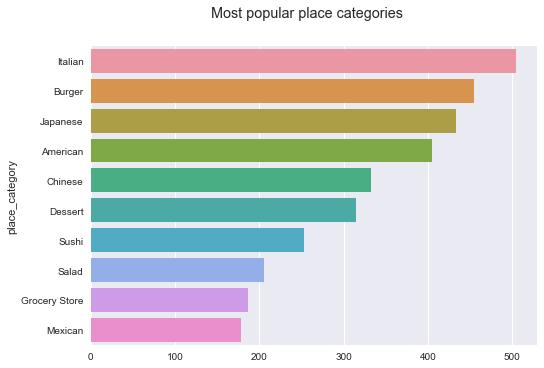

In [5]:
popular_places = df.groupby('place_category').size().sort_values(ascending=False).head(10)

sns.plt.suptitle('Most popular place categories')
sns.barplot(y=popular_places.axes[0],x=popular_places.values)

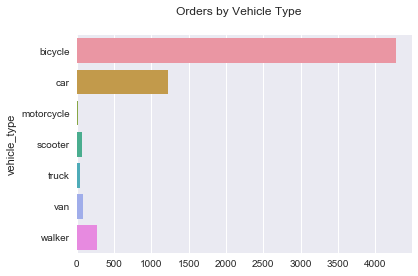

In [17]:
vehicles = df.groupby('vehicle_type').size()

sns.plt.suptitle('Orders by Vehicle Type')
sns.barplot(x=vehicles.values,y=vehicles.axes[0])

In [319]:

## Data from NYC OpenData (https://data.cityofnewyork.us/) 

# PUMA to Census Tract Mapping
df_PUMAtoCensus = pd.read_excel('nyc2010census_tabulation_equiv.xlsx',skiprows=3)
#df_PUMAtoCensus.columns = df_PUMAtoCensus.loc[1]

# 2010 Population by Census Tract
df_CensusTracts = pd.read_csv('New_York_City_Population_By_Census_Tracts.csv')

#Joining the two tables to get population by PUMA
PUMApopulation = pd.merge(df_CensusTracts, 
         df_PUMAtoCensus[['2010 Census Tract','PUMA']], 
         left_on = 'Census Tract', 
         right_on = '2010 Census Tract').groupby('PUMA').sum()['Population']




In [324]:
PUMApopulation.head(5)

PUMA
3701    632107
3702    564538
3703    592721
3704    621807
3705    841947
Name: Population, dtype: int64

In [295]:
df_CensusTracts.head(5)

Borough  Year  FIPS County Code  DCP Borough Code Census Tract  Population
0   Bronx  2000                 5                 2       000100       12780
1   Bronx  2000                 5                 2       000200        3545
2   Bronx  2000                 5                 2       000400        3314
3   Bronx  2000                 5                 2       001600        5237
4   Bronx  2000                 5                 2       001900        1584

In [296]:
df_PUMAtoCensus.head(5)

Borough  2010 Census Bureau FIPS County Code  2010 NYC Borough Code  \
0     NaN                                  NaN                    NaN   
1   Bronx                                    5                      2   
2   Bronx                                    5                      2   
3   Bronx                                    5                      2   
4   Bronx                                    5                      2   

   2010 Census Tract  PUMA Neighborhood Tabulation Area (NTA)  \
0                NaN   NaN                               Code   
1              31000  3704                               BX31   
2              31200  3704                               BX31   
3              31400  3704                               BX31   
4              31600  3704                               BX31   

                Unnamed: 6  
0                     Name  
1  Allerton-Pelham Gardens  
2  Allerton-Pelham Gardens  
3  Allerton-Pelham Gardens  
4  Allerton-Pelham Gardens

In [67]:
## DATA INTEGRITY ##

#550 records where when_the_Jumpman_arrived_at_pickup and _left_pickup is null 
len(df[df.when_the_Jumpman_arrived_at_pickup.isnull()])

print('Null values in each column')
print(df.isnull().sum())
    

Null values in each column
delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64


In [95]:

def drawPoints(mapObj,lat,lon,title,content):

    mapObj.draw(shape=[lat, lon], attributes={"title":"Search Location", "content":"Predicted crash location"},
           symbol = {
    "type": "esriSMS",
     "style": "esriSMSCircle",
     "color": [76,115,0,255],
     "size": 3,
     "angle": 0,
     "xoffset": 0,
     "yoffset": 0,
     
    }, popup = {'title':title,'content':content})

In [112]:
ny.center = [40.7261, -73.9727]


ny.zoom = 11